**Importing** **libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Training Dataset

In [2]:
df_train=pd.read_csv('/content/Polynomialdata_train.csv')
df_train

,target,feature 1,feature 2,feature 3
0,4.131528e+06,5.221849,7.295111,95.716846
1,3.172975e-01,-5.106284,4.220085,-6.172360
2,4.676422e+04,-4.218053,-7.573823,-39.493884
3,1.404175e+05,-18.439122,-2.275148,-40.885857
4,4.788988e+03,13.353046,3.103837,18.622367
...,...,...,...,...
49995,1.853922e+04,-25.309264,-6.094516,75.361431
49996,6.379917e+03,-58.016982,-6.064214,27.146387
49997,3.835601e+06,29.857894,1.422973,75.620505
49998,2.580318e+04,10.793146,1.215972,34.437761


In [57]:
x=df_train.drop(['target'],axis=1).values
y=df_train['target'].values
x

array([[  5.22184894,   7.29511056,  95.71684555],
       [ -5.10628445,   4.22008546,  -6.17236   ],
       [ -4.21805344,  -7.57382297, -39.49388399],
       ...,
       [ 29.85789417,   1.42297302,  75.62050543],
       [ 10.79314567,   1.21597176,  34.43776063],
       [ 12.17170222,  -0.79875632,  60.24598982]])

Spiltting into Training set and Validation set

In [58]:
spilt_ratio=0.8
spilt_index=int(spilt_ratio* x.shape[0])
x_train=x[:spilt_index]
x_val=x[spilt_index:]
y_train=y[:spilt_index]
y_val=y[spilt_index:]
x_train.shape

(40000, 3)

Plotting Graph between different features and Target values

<ipython-input-59-ab940199bcf7>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,3,1)


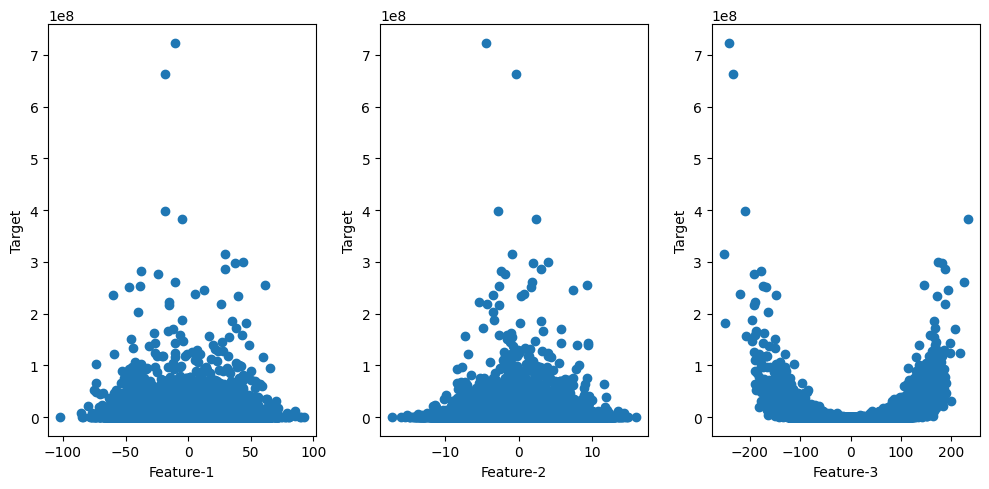

In [59]:
plt.figure(figsize=(10,5))
plt.title("Features vs Target")
#plot1 - feature1 vs target
plt.subplot(1,3,1)
plt.scatter(x_train[:,:1],y_train)
plt.xlabel('Feature-1')
plt.ylabel('Target')

#plot1 - feature1 vs target
plt.subplot(1,3,2)
plt.scatter(x_train[:,1:2],y_train)
plt.xlabel('Feature-2')
plt.ylabel('Target')

#plot1 - feature1 vs target
plt.subplot(1,3,3)
plt.scatter(x_train[:,2:3],y_train)
plt.xlabel('Feature-3')
plt.ylabel('Target')

plt.tight_layout()
plt.show()

Defining different function to train the model

In [60]:
def compute_cost(x,y,w,b):
    m,n = x.shape
    f_wb = np.dot(x,w)+b
    cost = np.sum((f_wb - y)**2)
    cost = (cost)/(2*m)
    return cost

In [61]:
def compute_gradient(x,y,w,b):
    m,n = x.shape
    dj_dw= np.zeros(n)
    f_wb = np.dot(x,w)+b
    dj_db = np.mean((f_wb- y))
    dj_dw  =  (f_wb - y)@x
    dj_dw = (dj_dw)/m
    return dj_dw,dj_db

In [62]:
def gradient_descent(x,y,alpha, iterations):
    m,n=x.shape
    w=np.zeros(n)
    b=0
    cost=[]
    for i in range(iterations):
        dj_dw,dj_db=compute_gradient(x,y,w,b)
        w-= alpha*dj_dw
        b-=alpha*dj_db
        c=compute_cost(x,y,w,b)
        cost.append(c)
        if i%(iterations/10)==0:
           print("Iteration= ",i)
           print("Cost= ", c)
    return w,b,cost

Fitting into a Polynomial

In [63]:
def count_combinations(degree):
    count=0
    for i in range(degree+1):
        for j in range(degree+1):
            for k in range(degree+1):
                if i+j+k<=degree:
                    count+=1
    return count

In [64]:
def fit_polynomial(x,degree):
    m,n=x.shape
    count=count_combinations(degree)
    x_poly=np.ones((m,count))
    index=0
    for i in range(degree+1):
        for j in range(degree+1):
            for k in range(degree+1):
                if i+j+k<=degree:
                    x_poly[:,index]=((x[:,0])**i) *((x[:,1])**j)* ((x[:,2])**k)
                    index+=1
    return x_poly

In [65]:
x_train_poly1=np.delete(fit_polynomial(x_train,6),0,axis=1)
x_val_poly1=np.delete(fit_polynomial(x_val,6),0,axis=1)
x_train_poly1

array([[ 9.57168455e+01,  9.16171452e+03,  8.76930414e+05, ...,
         3.71629259e+05,  2.83239227e+04,  2.02742980e+04],
       [-6.17236000e+00,  3.80980280e+01, -2.35154744e+02, ...,
         2.14277350e+04, -1.46502914e+04,  1.77267868e+04],
       [-3.94938840e+01,  1.55976687e+03, -6.16012519e+04, ...,
         5.27339419e+04,  1.01128960e+04,  5.63212737e+03],
       ...,
       [ 4.03525665e+01,  1.62832963e+03,  6.57072795e+04, ...,
         1.75504544e+07,  4.62824913e+05,  5.83580329e+06],
       [-6.68519542e+01,  4.46918379e+03, -2.98773670e+05, ...,
        -9.41891849e+06, -5.71164784e+05,  1.50891341e+06],
       [-2.70882477e+01,  7.33773163e+02, -1.98766292e+04, ...,
         1.26367331e+10,  2.26022235e+09,  2.52711312e+10]])

Normalisation

In [66]:
def normalisation(x):
    mean=np.mean(x,axis=0)
    std=np.std(x,axis=0)
    x_norm=(x-mean)/std
    return x_norm

In [68]:
x_train_poly=normalisation(x_train_poly1)
x_train_poly

array([[ 1.70761776e+00,  1.35640296e+00,  1.28501544e+00, ...,
         7.37066397e-03, -7.52350331e-03, -1.37813966e-01],
       [-1.10051980e-01, -6.99442224e-01, -4.54582516e-04, ...,
         7.32765392e-03, -7.58547275e-03, -1.37814174e-01],
       [-7.04496952e-01, -3.56561135e-01, -9.03854705e-02, ...,
         7.33149880e-03, -7.54976388e-03, -1.37815157e-01],
       ...,
       [ 7.19937329e-01, -3.41111734e-01,  9.61828434e-02, ...,
         9.48048372e-03, -6.89694657e-03, -1.37341216e-01],
       [-1.19255588e+00,  2.99024373e-01, -4.37957292e-01, ...,
         6.16823651e-03, -8.38797474e-03, -1.37692953e-01],
       [-4.83184502e-01, -5.42684169e-01, -2.92388025e-02, ...,
         1.55930712e+00,  3.25170913e+00,  1.91650285e+00]])

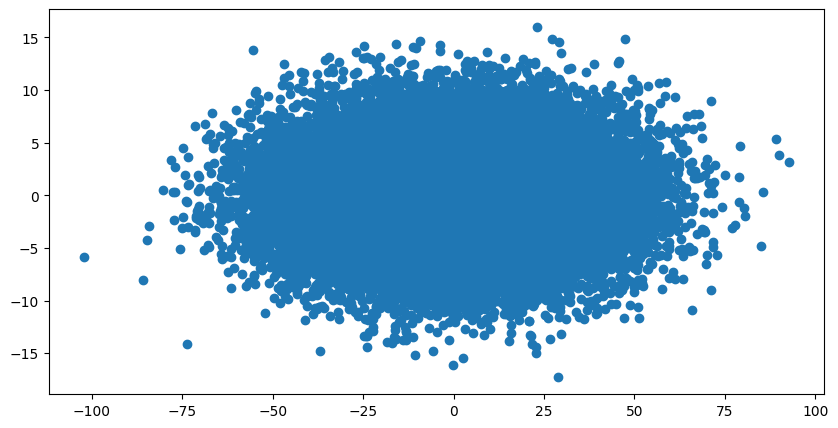

In [69]:
plt.figure(figsize=(10,5))
plt.scatter(x_train[:,0],x_train[:,1])
plt.xlabel("Feature-1")
plt.ylabel("Feature-2")
plt.show();

Training the model

In [70]:
w,b,cost=gradient_descent(x_train_poly,y_train,alpha=0.01, iterations=10000)

Iteration=  0
Cost=  57659354057931.87
Iteration=  1000
Cost=  297541951026.86615
Iteration=  2000
Cost=  151405864921.7153
Iteration=  3000
Cost=  103192389751.31352
Iteration=  4000
Cost=  76024811976.65442
Iteration=  5000
Cost=  58204790110.06072
Iteration=  6000
Cost=  45668595410.9353
Iteration=  7000
Cost=  36435656071.002335
Iteration=  8000
Cost=  29405784946.701443
Iteration=  9000
Cost=  23922114873.31855


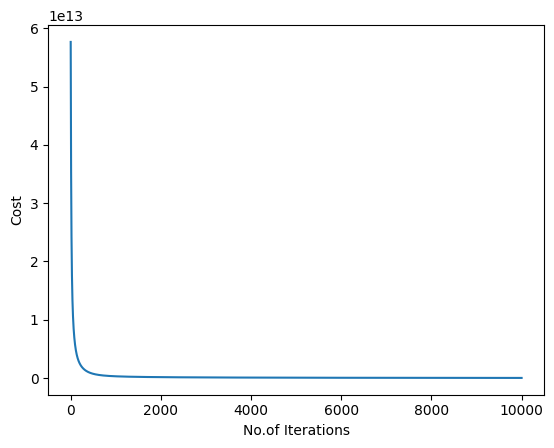

In [71]:
plt.plot(np.arange(len(cost)),cost)
plt.xlabel("No.of Iterations")
plt.ylabel("Cost")
plt.show()

In [72]:
w

array([-7.46920912e+04, -6.82369449e+05,  1.87740083e+05,  1.30760422e+06,
       -1.71361529e+05,  8.00205800e+06,  4.53924383e+03,  7.50175487e+04,
        3.58778242e+02, -2.20110073e+05, -3.58613837e+03,  1.16553577e+06,
       -2.86239341e+04, -8.48374639e+01,  2.01435477e+05,  1.68725008e+04,
       -8.18506625e+04, -6.15521362e+03,  1.03331314e+04, -2.61597708e+02,
       -9.60285654e+03, -2.65243854e+04, -9.04621008e+03, -1.94605592e+04,
        1.87429777e+03,  1.27217548e+03,  1.71253931e+04, -8.97786785e+03,
       -3.12370289e+05,  4.76107309e+04,  6.34712403e+05, -6.28433446e+04,
        5.96256203e+06,  1.44527078e+04, -1.75143117e+04, -6.85505668e+04,
        9.08421666e+03,  6.32363745e+05, -2.65409138e+03,  4.51852221e+04,
        4.41685251e+02,  1.22362610e+04,  1.02052812e+04,  1.15556212e+04,
       -2.26975427e+03, -3.05317457e+03, -1.79809678e+03, -8.80759353e+03,
       -7.29754584e+04,  2.68200594e+04,  3.43047489e+05, -3.24124931e+04,
        2.87964662e+06, -

In [73]:
b

1745315.6901033793

Making the model to predict the output of validation set

In [74]:
def predict(x,w,b):
    pred=np.dot(x,w)+b
    return pred

In [75]:
x_val_poly=normalisation(x_val_poly1)
x_val

array([[ 23.62686071,  -1.18028591, 116.25551837],
       [ 23.9199608 ,   2.38170772, -51.8418781 ],
       [ 22.83891031,   0.30767371,  11.86671588],
       ...,
       [ 29.85789417,   1.42297302,  75.62050543],
       [ 10.79314567,   1.21597176,  34.43776063],
       [ 12.17170222,  -0.79875632,  60.24598982]])

In [76]:
y_val_pred=predict(x_val_poly,w,b)
for i in range(10):
    print("y_val_pred=", y_val_pred[i])
    print("y_val_true=", y_val[i])

y_val_pred= 20455931.85289576
y_val_true= 18299164.91764202
y_val_pred= -286552.36347744474
y_val_true= 714.9656764522823
y_val_pred= -321140.7411000023
y_val_true= 4736.492247834457
y_val_pred= -417177.66285933205
y_val_true= 80594.80337009717
y_val_pred= -373007.32355017005
y_val_true= 13636.624225980971
y_val_pred= -228899.88873374532
y_val_true= 211740.12994477391
y_val_pred= 265620.8468217137
y_val_true= 703049.4094531193
y_val_pred= -197674.76870075776
y_val_true= 227.69907455565576
y_val_pred= -372006.4750854864
y_val_true= 11146.446118996231
y_val_pred= -226288.38225466758
y_val_true= 1074.4716243231164


Graph between predicted values and true values for validation set

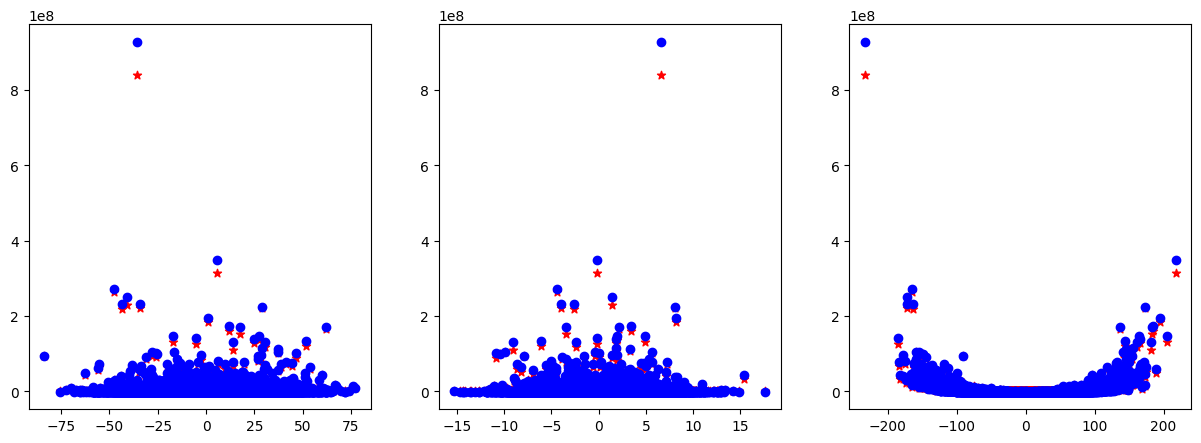

In [86]:
plt.figure(figsize=(15,5))
for i in range(3):
    plt.subplot(1,3,i+1)
    plt.scatter(x_val[:,i],y_val,color='r',marker='*',label="True value")
    plt.scatter(x_val[:,i],y_val_pred,color='b',label="Predicted value")
plt.show()

R2 Score of validation set

In [80]:
ssr=np.sum((y_val-y_val_pred)**2)
sst=np.sum((y_val-np.mean(y_val))**2)
R2_score= 1-(ssr/sst)
print("R2 score=", R2_score)

R2 score= 0.9882882760497868


Testing the model

In [83]:
df_test=pd.read_csv('/content/Polynomialdata_test.csv')
df_test

,ID,feature 1,feature 2,feature 3
0,16588,36.247643,-2.372704,43.835947
1,17513,5.903779,5.460086,-96.149414
2,14448,-37.298157,6.869786,-14.084487
3,13972,-40.080077,2.395066,-43.432941
4,18321,-20.417799,-2.194459,5.737226
...,...,...,...,...
9995,19691,-13.571554,2.931176,76.902716
9996,10512,-2.015904,-2.827700,4.999604
9997,17741,47.095192,-1.977461,39.044902
9998,18381,-1.808178,-0.693782,57.918628


In [84]:
x_test=df_test.drop(['ID'],axis=1).values
x_test

array([[ 36.24764264,  -2.37270368,  43.83594722],
       [  5.90377936,   5.46008554, -96.14941417],
       [-37.29815674,   6.869786  , -14.08448749],
       ...,
       [ 47.09519214,  -1.97746088,  39.04490212],
       [ -1.80817812,  -0.69378162,  57.91862776],
       [ 19.95803371,   2.29451622, -16.08254613]])

In [87]:
x_test_poly1=np.delete((fit_polynomial(x_test,6)),0,axis=1)
x_test_poly1

array([[ 4.38359472e+01,  1.92159027e+03,  8.42347296e+04, ...,
         2.74302164e+09, -1.48471242e+08,  2.26818569e+09],
       [-9.61494142e+01,  9.24470985e+03, -8.88873436e+05, ...,
        -6.89599970e+05,  3.91606632e+04,  4.23429108e+04],
       [-1.40844875e+01,  1.98372788e+02, -2.79397905e+03, ...,
         1.01666506e+09, -4.95883956e+08,  2.69230475e+09],
       ...,
       [ 3.90449021e+01,  1.52450438e+03,  5.95241244e+04, ...,
         9.04580463e+09, -4.58132146e+08,  1.09108714e+10],
       [ 5.79186278e+01,  3.35456744e+03,  1.94291943e+05, ...,
        -1.11950055e+03,  1.34100018e+01,  3.49500063e+01],
       [-1.60825461e+01,  2.58648290e+02, -4.15972306e+03, ...,
        -5.09264689e+07,  7.26574063e+06,  6.31984622e+07]])

In [89]:
x_test_poly=normalisation(x_test_poly1)
x_test_poly

array([[ 7.73641787e-01, -2.75159371e-01,  1.14920382e-01, ...,
         3.69112738e-01, -2.21588948e-01,  6.04630599e-02],
       [-1.72519578e+00,  1.38068335e+00, -1.33341709e+00, ...,
        -1.79935751e-04, -1.21246007e-02, -1.40927084e-01],
       [-2.60278879e-01, -6.64798934e-01, -1.46098637e-02, ...,
         1.36751975e-01, -7.11592182e-01,  9.81209092e-02],
       ...,
       [ 6.88118248e-01, -3.64945119e-01,  7.81420495e-02, ...,
         1.21744238e+00, -6.58345688e-01,  8.27853593e-01],
       [ 1.02502758e+00,  4.88534760e-02,  2.78725385e-01, ...,
        -8.72690046e-05, -1.21798153e-02, -1.40930841e-01],
       [-2.95945637e-01, -6.51169941e-01, -1.66425855e-02, ...,
        -6.94161949e-03, -1.93197554e-03, -1.35319405e-01]])

In [91]:
y_test_pred=predict(x_test_poly,w,b)
y_test_pred

array([ 116634.71681599,  468346.83502262, -536574.2221998 , ...,
        549346.51770683, -546556.99138196, -253368.23713555])